# Insert the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# load the both datasets

In [2]:
movie_id_titles = pd.read_csv('Movie_Id_Titles.csv')
movie_id_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [3]:
dataset = pd.read_csv('Dataset.csv')
dataset.tail()

,user_id,item_id,rating,timestamp
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156
100002,12,203,3,879959583


# we have to check if there is NA values in both datasets

In [4]:
movie_id_titles.isnull().sum()

item_id    0
title      0
dtype: int64

In [5]:
dataset.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

# by using 'item_id' we can merge both datasets into one dataframe

In [6]:
dataset_rating_user = pd.merge(left = dataset, right = movie_id_titles, on = 'item_id')
dataset_rating_user

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)
...,...,...,...,...,...
99998,840,1674,4,891211682,Mamma Roma (1962)
99999,655,1640,3,888474646,"Eighth Day, The (1996)"
100000,655,1637,3,888984255,Girls Town (1996)
100001,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [7]:
dataset_rating_user.describe() # have a look of our dataframe information

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


# create a new dataframe : movie_rating
# group our data by title with the mean of the rating column


In [8]:
movie_rating = pd.DataFrame(dataset_rating_user.groupby('title')['rating'].mean())
movie_rating

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
...,...
Young Guns II (1990),2.772727
"Young Poisoner's Handbook, The (1995)",3.341463
Zeus and Roxanne (1997),2.166667


In [9]:
dataset_rating_user.groupby('title')['rating'].count()

title
'Til There Was You (1997)                  9
1-900 (1994)                               5
101 Dalmatians (1996)                    109
12 Angry Men (1957)                      125
187 (1997)                                41
                                        ... 
Young Guns II (1990)                      44
Young Poisoner's Handbook, The (1995)     41
Zeus and Roxanne (1997)                    6
unknown                                    9
Á köldum klaka (Cold Fever) (1994)         1
Name: rating, Length: 1664, dtype: int64

# create a new column: counts for the movie_rating

In [10]:
movie_rating['counts'] = pd.DataFrame(dataset_rating_user.groupby('title')['rating'].count())


In [11]:
movie_rating.sort_values(by = 'rating',ascending=False) # checking the movie ratings with most counts

,rating,counts
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


# using seaborn, we visualize which rating the users has submitted

<AxesSubplot:xlabel='rating', ylabel='count'>

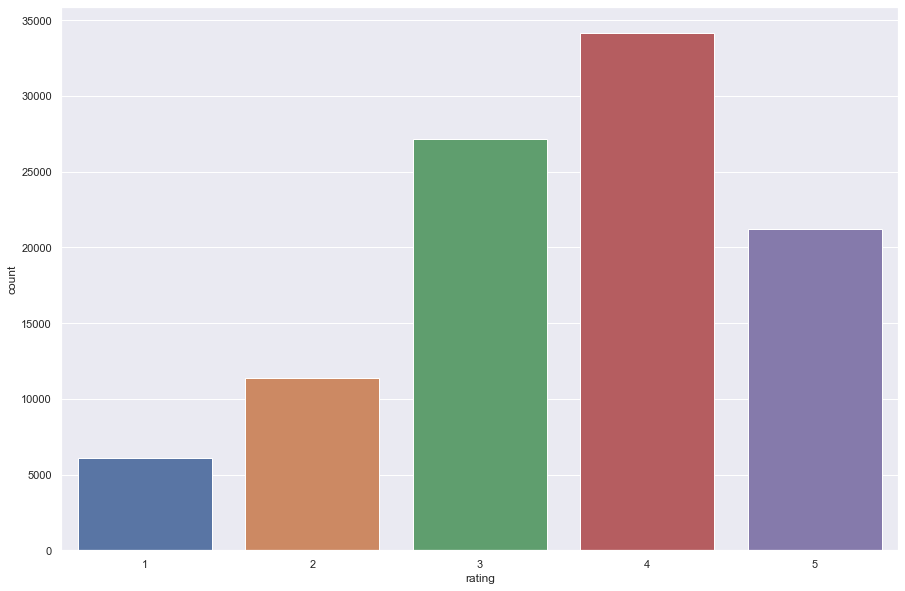

In [12]:
plt.figure(figsize=(15,10))
sns.countplot(x = 'rating', data = dataset_rating_user)


# using pivot_table, we create a new dataframe (movie_rating_user)
# user_id as rows and movies as columns

In [13]:
movie_rating_user = pd.DataFrame.pivot_table(dataset_rating_user, index = 'user_id', columns='title', values= 'rating')
movie_rating_user

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
movie_rating_user.shape

(944, 1664)

# using the corr function, we can find the pairwise correlation of all columns in the dataframe with a specific movie we choose
# then we create a new dataframe cosisting of columns, titles and correlation
# since not all users rated all the movies, we have to drop NA

In [15]:
movie = movie_rating_user['2001: A Space Odyssey (1968)']
movies_similar = movie_rating_user.corrwith(movie)
movies_similar_corr = pd.DataFrame(movies_similar,columns=['Correlation'])
movies_similar_corr.dropna(inplace=True)
movies_similar_corr.sort_values('Correlation', ascending=False).head()


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
Faithful (1996),1.0
"Good Man in Africa, A (1994)",1.0
Dream With the Fishes (1997),1.0
Switchback (1997),1.0
2001: A Space Odyssey (1968),1.0


# we join both 'rating' and 'counts' columns from movie_rating dataframe to our newly correlated data

In [16]:
movies_similar_corr = movies_similar_corr.join(movie_rating['rating'])
movies_similar_corr
                                           

,Correlation,rating
title,,
'Til There Was You (1997),-0.426401,2.333333
1-900 (1994),-0.981981,2.600000
101 Dalmatians (1996),-0.043407,2.908257
12 Angry Men (1957),0.178848,4.344000
187 (1997),-0.554700,3.024390
...,...,...
Young Guns (1988),-0.174918,3.207921
Young Guns II (1990),-0.154765,2.772727
"Young Poisoner's Handbook, The (1995)",-0.341753,3.341463


In [17]:
movies_similar_corr_rating = movies_similar_corr.join(movie_rating['counts'])
movies_similar_corr_rating[movies_similar_corr_rating['counts']> 100].sort_values(by = 'Correlation',ascending=False) # we sort our table by the positive correlated movies with the most counts

,Correlation,rating,counts
title,,,
2001: A Space Odyssey (1968),1.000000,3.969112,259
True Romance (1993),0.459189,3.615385,104
Natural Born Killers (1994),0.442248,2.953125,128
Being There (1979),0.425009,3.905172,116
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),0.392916,4.252577,194
...,...,...,...
Air Force One (1997),-0.282994,3.631090,431
One Fine Day (1996),-0.306766,3.232143,112
Jungle2Jungle (1997),-0.408455,2.439394,132
